In [80]:
import sys
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from sklearn import preprocessing
import time

from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

from hyunjun.sir_package import sir_function as sf

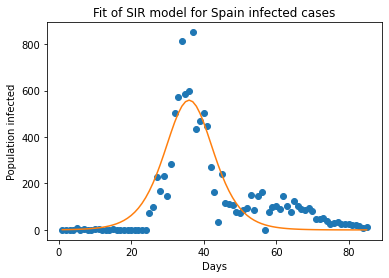

Optimal parameters: beta = 46.6550876337091  and gamma =  46.43490301787703


In [81]:
# "train.csv" 파일을 읽습니다.
train = pd.read_csv("train.csv")

# Province_State 정보가 없는 경우 "None"으로 채워 넣습니다.
train.Province_State.fillna("None", inplace=True)

spain_df = pd.DataFrame()
spain_df['ConfirmedCases'] = train.loc[train['Country_Region'] == 'Korea, South'].ConfirmedCases.diff().fillna(0)


spain_df = spain_df[5:]
spain_df['day_count'] = list(range(1, len(spain_df)+1))

spain_df.to_csv('korea_test.csv', sep=" ")

y_data = [i for i in spain_df.ConfirmedCases]
x_data = spain_df.day_count
y_data = np.array(y_data, dtype=float)
x_data = np.array(x_data, dtype=float)

# spain_population = float(46750238)
spain_population = float(50000000)

N = spain_population
inf0 = y_data[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, x_data, y_data)
fitted = fit_odeint(x_data, *popt)

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
